In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving roads.jpeg to roads.jpeg


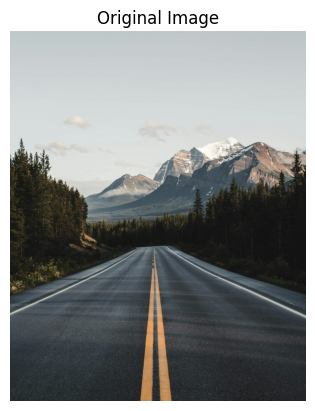

In [ ]:
image = cv2.imread("roads.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

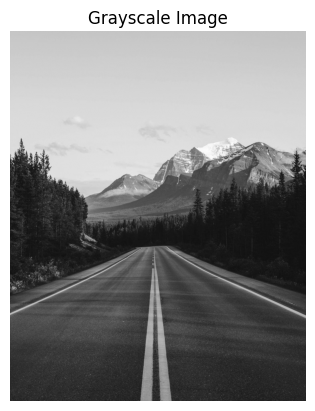

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

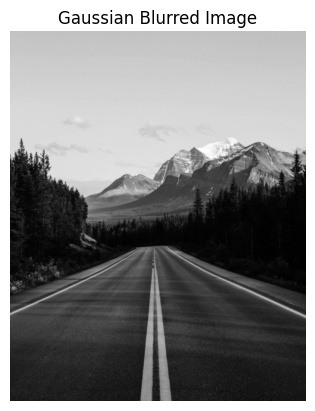

In [ ]:
blur = cv2.GaussianBlur(gray, (5,5), 0)

plt.imshow(blur, cmap='gray')
plt.title("Gaussian Blurred Image")
plt.axis("off")
plt.show()

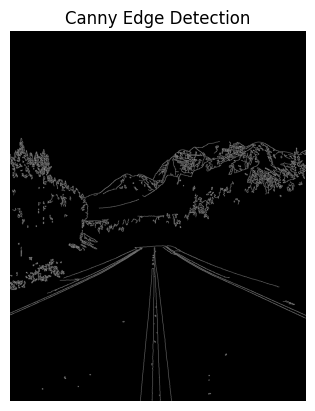

In [ ]:
edges = cv2.Canny(blur, 50, 150)

plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")
plt.show()

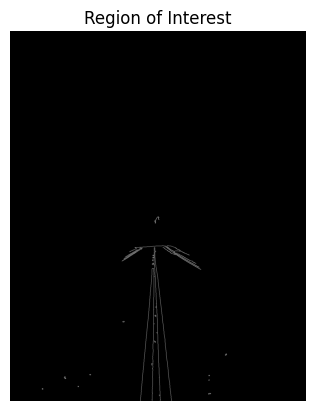

In [ ]:
height, width = edges.shape
mask = np.zeros_like(edges)

polygon = np.array([[
    (0, height),
    (width, height),
    (width//2, height//2)
]], np.int32)

cv2.fillPoly(mask, polygon, 255)
roi = cv2.bitwise_and(edges, mask)

plt.imshow(roi, cmap='gray')
plt.title("Region of Interest")
plt.axis("off")
plt.show()

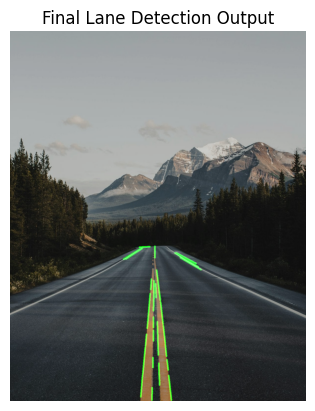

In [ ]:
line_image = np.zeros_like(image)

lines = cv2.HoughLinesP(roi, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1,y1), (x2,y2), (0,255,0), 5)

final = cv2.addWeighted(image, 0.8, line_image, 1, 1)

plt.imshow(final)
plt.title("Final Lane Detection Output")
plt.axis("off")
plt.show()